In [7]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [9]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [11]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [5]:
print("Current Working Directory " , os.getcwd())

Current Working Directory  c:\Users\laris\repos\eo-data


In [4]:
os.chdir('..')

In [13]:
path_csv = 'data/rs/outputs/ausVI202210.csv'

df = pd.read_csv(path_csv)
df.head(1)

,AREA,COUNT,FILE,MAX,MEAN,MEDIAN,MIN,NAME,OBJECTID,PCT90,RANGE,STD,SUM,ZONE_CODE
0,135214.167681,275624.0,NDVI221009,0.59136,0.399441,0.396446,0.155955,17,1,0.507441,0.435404,0.078235,110095.476553,1


In [22]:
df['DATE'] = df['FILE'].str[-6:]
df['INDEX'] = df['FILE'].str[:4]
df.head(1)

,AREA,COUNT,FILE,MAX,MEAN,MEDIAN,MIN,NAME,OBJECTID,PCT90,RANGE,STD,SUM,ZONE_CODE,DATE,INDEX
0,135214.167681,275624.0,NDVI221009,0.59136,0.399441,0.396446,0.155955,17,1,0.507441,0.435404,0.078235,110095.476553,1,221009,NDVI


In [20]:
df['DATE'].unique()

array(['221009', '221016', '221019'], dtype=object)

In [27]:
df['INDEX'].unique()

array(['NDVI', 'GNDVI', 'SAVI', 'EVI', 'TRVI'], dtype=object)

In [26]:
df['INDEX'] = np.where(df['INDEX'] == 'GNDV', 'GNDVI', df['INDEX'])
df['INDEX'] = np.where(df['INDEX'] == 'EVI2', 'EVI', df['INDEX'])

In [28]:
df['NAME'].unique()

array(['17', '18', '8', '19N', '19S', '1', '4'], dtype=object)

In [42]:
# exclude EVI from all charts since it is on different scale than other indicies
df1 = df.loc[df['INDEX'] !='EVI']

In [60]:
# for plotting change bar charts per field, subset each to df

df_17 = df1.loc[df1['NAME'] =='17']
df_18 = df1.loc[df1['NAME'] =='18']
df_8 = df1.loc[df1['NAME'] =='8']
df_19N = df1.loc[df1['NAME'] =='19N']
df_19S = df1.loc[df1['NAME'] =='19S']
df_1 = df1.loc[df1['NAME'] =='1']
df_4 = df1.loc[df1['NAME'] =='4']

In [41]:
# simple plot in Pandas
#ax = df_17['MEAN'].plot.bar(x='INDEX', y='DATE', rot=0)
#plt.show()

File with graph created, you can run other location now!


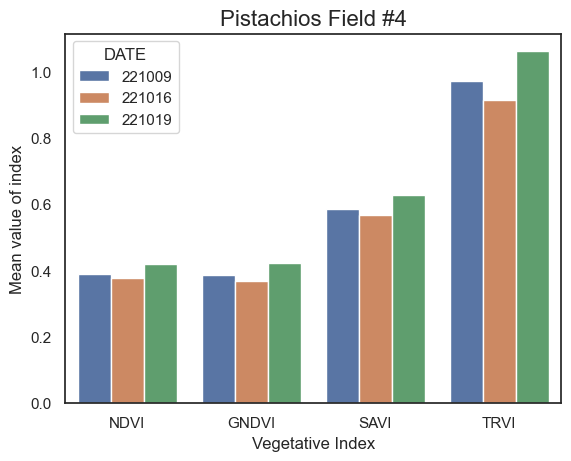

In [61]:
import seaborn as sns
#set seaborn plotting aesthetics
sns.set(style='white')

#create grouped bar chart
sns.barplot(x='INDEX', y='MEAN', hue='DATE', data=df_4) 

#customizing with titles
#add overall title
plt.title('Pistachios Field #4', fontsize=16)

#add axis titles
plt.xlabel('Vegetative Index')
plt.ylabel('Mean value of index')

#saving to file
# Saving graph to file
plt.savefig('2022-10-AUS-fld4-VIs.png',dpi=300,transparent=False)
print('File with graph created, you can run other location now!')

plt.show()